# RANDOM-FOREST

## Base Risco Crédito

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export

import graphviz

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
base = pd.read_csv('/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/risco_credito.csv')

#x e y
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values

In [3]:
# transformando as variaveis categoricas em numericas
labelencoder = LabelEncoder()

previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])

In [4]:
# treinando
classificador = DecisionTreeClassifier(criterion='entropy' )
classificador.fit(previsores, classe)

# importancia das features
print(classificador.feature_importances_) #segue a mesma ordem da base de dados

[0.41391643 0.06408636 0.03885431 0.4831429 ]


In [5]:
# Visualizando a arvore
export.export_graphviz(classificador, out_file='arvore.dot',
                      feature_names=['historia', 'divida', 'garantias', 'renda'],
                      class_names=['alto', 'moderado', 'baixo'],
                      filled=True,
                      leaves_parallel=True)

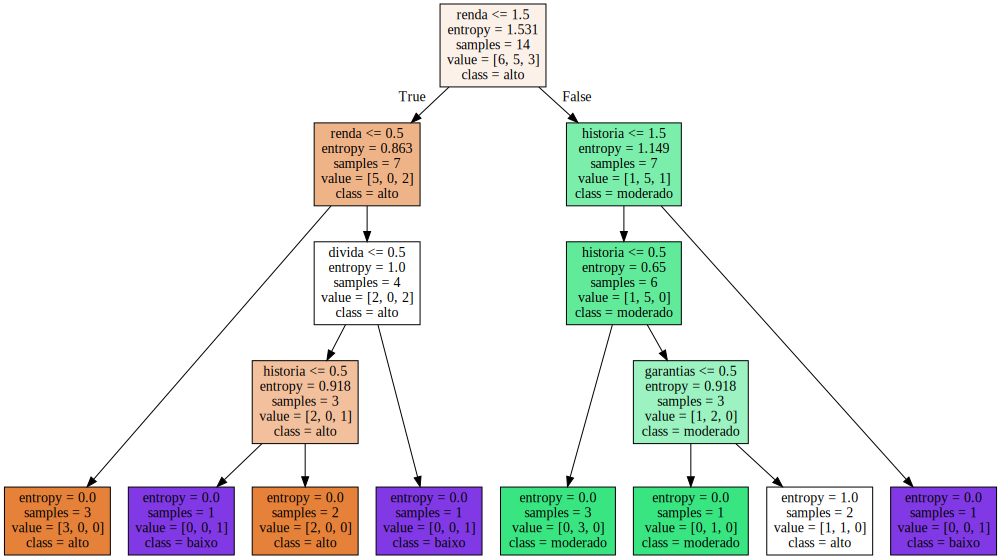

In [6]:
# Visualizando a arvore
with open("arvore.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## BASE CRÉDITO

Treinando novamente o modelo, mas com uma base diferente: **Credit_Data**

In [30]:
# Importando dataset
base = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/credit_data.csv')

In [31]:
# Corrigindo idades negativas
base.loc[base.age < 0, 'age'] = 40.92

In [32]:
# Separando os valores X e Y
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:,4].values

In [33]:
# Tratando valores nulos
import numpy as np 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(previsores[:, 0:3]) 
previsores[:, 0:3] = imputer.transform(previsores[:,0:3])

In [34]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [35]:
# Separando as bases
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, 
                                                                                              test_size=0.25, 
                                                                                              random_state=0)

In [36]:
# Treinando o modelo
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [38]:
# Verificando a acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [40]:
print(precisao)
print('---')
print(matriz)

0.982
---
[[430   6]
 [  3  61]]


## BASE CENSUS

In [59]:
# importando a base
base = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Machine Learning n Data Science de A a Z/census.csv')
base.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
# Separando X e Y
previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values

In [53]:
# Normalizando
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer
 
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
previsores = onehotencorder.fit_transform(previsores).toarray()

In [54]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [55]:
# Separando treino e teste
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [56]:
# Treinando
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [57]:
# Acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [58]:
print(precisao)
print('------')
print(matriz)

0.847697031729785
------
[[3418  275]
 [ 469  723]]
